# Цель: 

    -Прогноз вероятности оттока (на уровне следующего месяца) для каждого клиента;
    
    -Сформировать типичные портреты пользователей: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    
    -Проанализировать основные признаки, наиболее сильно влияющие на отток;
    
    -Сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

# Импорт библиотек и инструментов

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 5]
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

# Первичный анализ данных 

In [2]:
gym_churn = pd.read_csv('gym_churn.csv')

In [3]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym_churn.columns =  [x.lower() for x in gym_churn.columns]

In [5]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
gym_churn.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [8]:
gym_churn.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


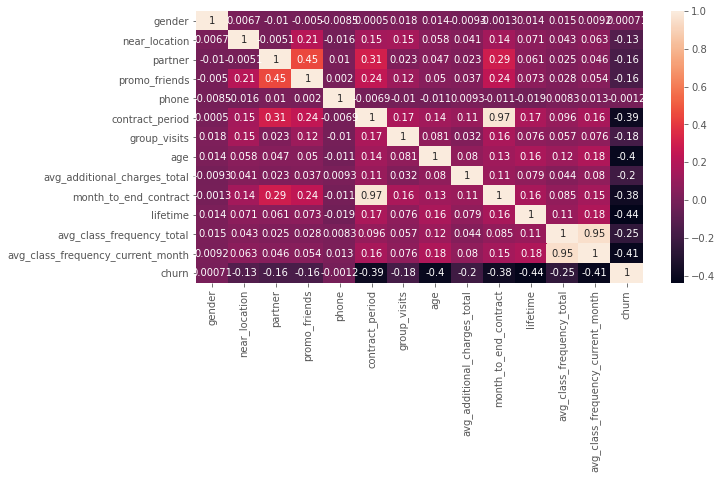

In [9]:
sns.heatmap(gym_churn.corr(), annot = True);

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


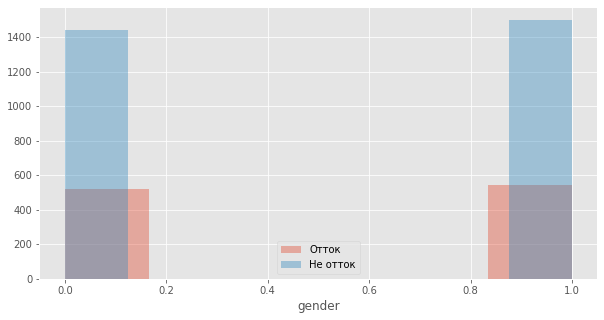

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


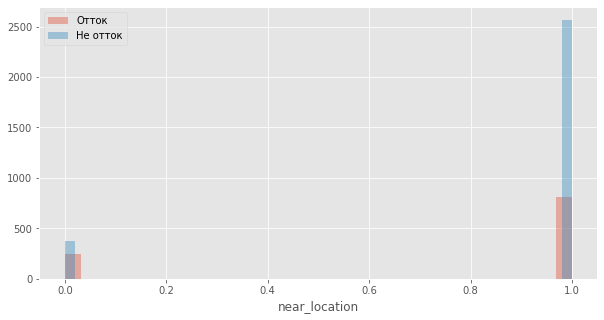

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


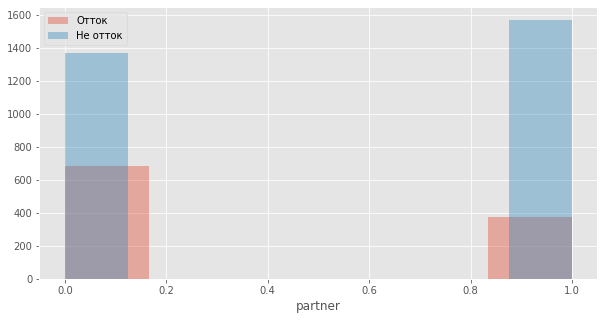

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


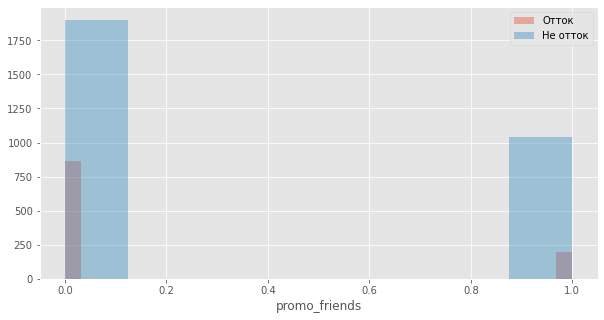

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


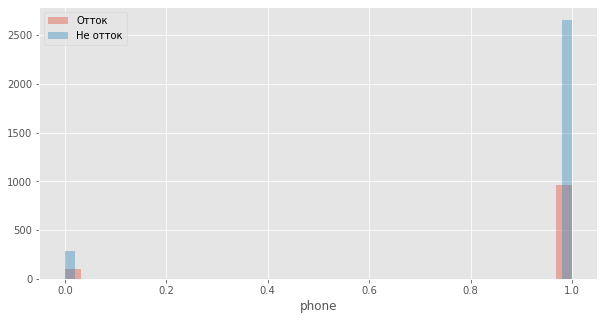

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


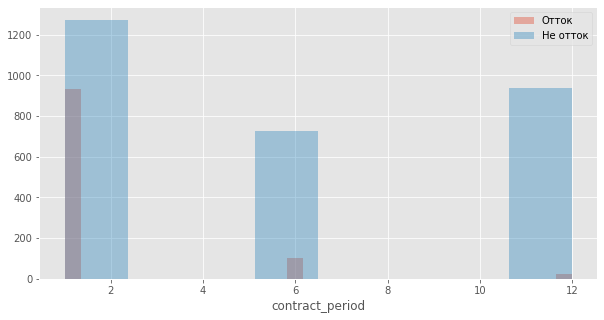

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


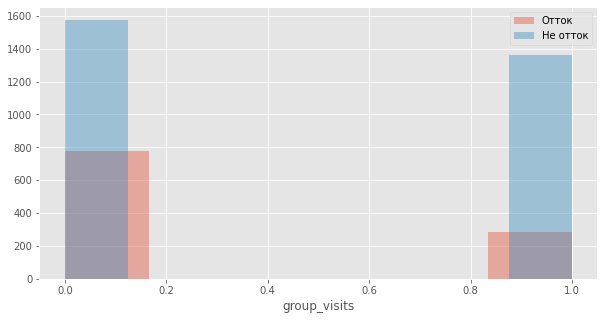

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


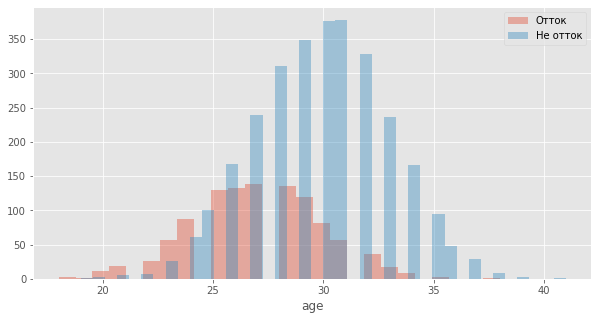

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


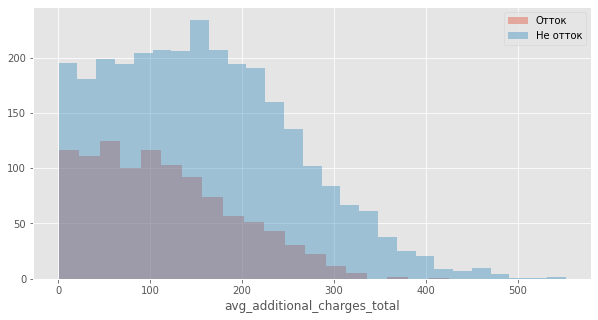

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


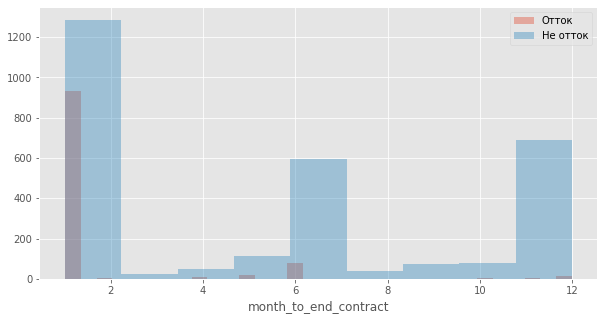

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


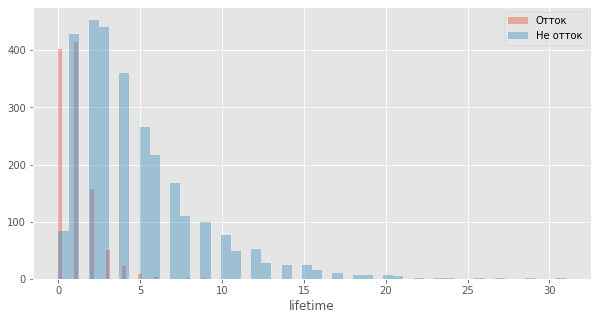

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


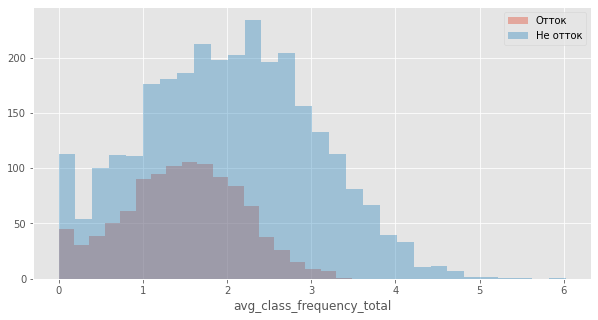

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


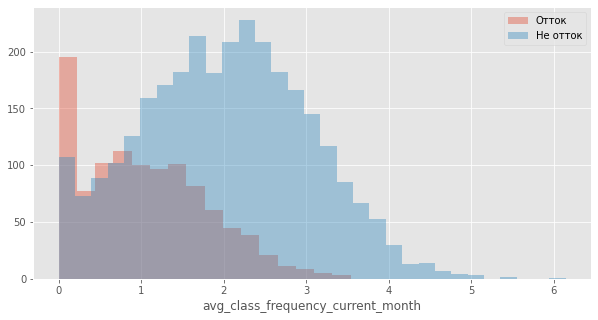

/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Python/3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


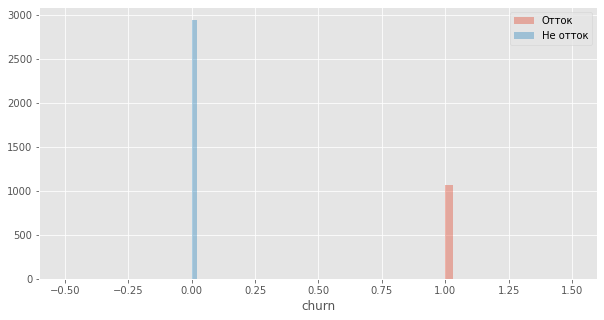

In [10]:
for i in gym_churn.columns:
    sns.distplot(gym_churn.query('churn==1')[i], label = 'Отток', kde = False)
    sns.distplot(gym_churn.query('churn==0')[i], label = 'Не отток', kde = False)
    plt.legend()
    plt.show();

## Выводы: 

В целом данные в хорошем состоянии: датафрейм состоит из 4000 строк и 14 столбцов с различными характеристиками (пол, частота посещений, факт оттока, срок жизни клиента и т.д.). 
Пропуски и дубликаты отсутствуют.

Для удобства лучше привести названия колонок к нижнему регистру. 

На первый взгляд можно установить следующие факты: 

1) Большинство клиентов живет рядом со спортзалом (почти 85%)

2) Гендерный состав примерно равный

3) В отток попадает около 27% клиентов, в основном на начальном периоде жизни.

При этом стоит обратить внимание, что в группе, где оттока нет, клиентов, живущих рядом с залом, - больше, эти клиенты старше и у них долгосрочные контракты. 
От этих же клиентов выше выручка по доп услугам, а в зал они ходят чаще. 


Особо интересной корреляции между показателями нет, разве что между графами parnter и  promo_friends наблюдается. Скорее всего люди часто зовут своих коллег на совместный фитнес. 

# Модели прогнозирования оттока пользователей

In [11]:
x = gym_churn.drop(columns = ['churn'])
y = gym_churn['churn']


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [13]:
#функция для вывода метрик по определенной модели
def metrics(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('accuracy:{:.2f} precision:{:.2f} recall:{:.2f} '.format(accuracy_score(y_test, y_pred), 
                                          precision_score (y_test, y_pred),
                                                                    recall_score (y_test, y_pred)))

In [14]:
#модель логистической регрессии
l_model = LogisticRegression(random_state =42)

In [15]:
metrics(l_model, x_train, y_train, x_test, y_test)

accuracy:0.91 precision:0.87 recall:0.77 


/Library/Python/3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
#лес случайных деревьев 
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [17]:
metrics(rf_model, x_train, y_train, x_test, y_test)

accuracy:0.91 precision:0.85 recall:0.78 


# Выводы:

У обеих моделей доля правильных ответов больше 90%. При этом логистическая регрессия показала себя немного лучше (0.92 против 0.91). 
Аналогичная ситуация с точностью и полнотой. 

В целом можно сказать, что из слабых моделей, логистическая регрессия справляется лучше, чем лес случайных дерерьев, но обе модели показывают неплохой результат. 

# Кластеризация пользователей. 

In [18]:
#Стандартизация данных 
scaler = StandardScaler()
scaler.fit(x)
x_st = scaler.transform(x)


In [19]:
#построим матрицу расстояний на тестовой выборке
linked = linkage(x_st, method = 'ward')

In [ ]:
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

На дендрограмме четко видны 4 кластера, хотя на мой взгляд их пять (правый кластер, кажется можно разбить на два, а то и на три). 

## Кластеризация

In [ ]:
km = KMeans(n_clusters = 5, random_state = 42) # задаём число кластеров, равное 5
labels = km.fit_predict(x) # применяем алгоритм к данным и формируем вектор кластеров

In [ ]:
gym_churn['cluster'] = labels

In [ ]:
gym_churn.groupby('cluster').mean().T

По кластерам лучше всего прослеживается разница по дополнительному доходу. 
Самый большой доход в кластере 0, самый маленький в кластере 3. 

In [ ]:
for i in gym_churn.columns:
    sns.distplot(gym_churn.query('cluster==0')[i], label = 'Кластер 0', kde =False)
    sns.distplot(gym_churn.query('cluster==1')[i], label = 'Кластер 1', kde =False)
    sns.distplot(gym_churn.query('cluster==2')[i], label = 'Кластер 2', kde =False)
    sns.distplot(gym_churn.query('cluster==3')[i], label = 'Кластер 3', kde =False)
    sns.distplot(gym_churn.query('cluster==4')[i], label = 'Кластер 4', kde =False)
    
    plt.legend()
    plt.show();

In [ ]:
gym_churn.groupby('cluster').agg({'churn':'mean'}).sort_values(by='churn')

# Выводы: 

Меньше всего к оттоку предрасположены кластеры 3,1,2 (5%, 18%, 23% соответсвенно), кластаеры 0 и 4 с довольно большим оттоком - уходит каждый третий клиент.


0, 2, 4 - самые большие кластеры, кластер 3 - самый маленький. 

Самый доходный кластер - 3-ий, клиенты этого кластера имеют самый низкий отток и больше всего приносят денег. 
За ним сразу 1 и 2, что логично: чем меньше отток, тем больше денег приносит клиент. 

Остальные признаки различаются не столь существенно.




# Общий вывод и рекомендации: 

Среди клиентов удалось нащупать 4-5 явных кластеров, и все же лучше, кажется, оставить 4 кластера, есть особо лояльные и выгодные клиенты - клиенты из 3-го кластера, есть и клиенты, которые часто уходят - кластеры 0 и 4. 


Срок жизни ощутимо влияет на доход от клиента, поэтому стоит подумать о том, чтобы увеличить этот показатель во всех группах. 

С самим алгоритмом прогнозирования оттока можно не мудрить. На этих данных отлично справляется логистическая регрессия, с большой долей вероятности она правильно предскажет возможный отток клиента, точность будет более 90%. 


## Что можно сделать, чтобы улучшить показатели оттока: 

1) Нужно состредоточиться на клиентах из 0 и 4 кластера - они чаще всего уходят. Может стоит собрать ОС, узнать какие потребности мы не закрываем, с ними стоит попробовать минимизировать отток. 

2) Кластеры 1 и 2 тоже можно проработать на отток, но еще можно попробовать увеличить их средний чек. Возможно, что не они не осведомлены обо всех наших услугах и предложениях, а могли бы потенциально воспользоваться. Во всяком случае удержать и раскачать лояльного клиента всегда проще, чем нового. 

3) В отток часто падают люди с небольшими контрактами и редко посещающие зал. Может стоит рассмотреть возможность сделать таким скидку на продление, чтобы они перешли в группу "долгожителей". Так мы сможем уменьшить вероятность оттока такого клиента. 


